In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Membaca dataset
df = pd.read_csv('crude-oil-price.csv', parse_dates=['date'])
df

,date,price,percentChange,change
0,1983-06-01 00:00:00+00:00,31.3800,NaN,NaN
1,1983-07-01 00:00:00+00:00,32.0000,1.976,0.6200
2,1983-08-01 00:00:00+00:00,31.5900,-1.281,-0.4100
3,1983-09-01 00:00:00+00:00,30.3600,-3.894,-1.2300
4,1983-10-01 00:00:00+00:00,30.3700,0.033,0.0100
...,...,...,...,...
490,2024-04-01 00:00:00+00:00,81.9300,-1.436,-1.1935
491,2024-05-01 00:00:00+00:00,76.9900,-6.030,-4.9400
492,2024-06-01 00:00:00+00:00,81.5400,5.910,4.5500
493,2024-07-01 00:00:00+00:00,77.9100,-4.452,-3.6300


In [9]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (495, 4)


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           495 non-null    datetime64[ns, UTC]
 1   price          495 non-null    float64            
 2   percentChange  494 non-null    float64            
 3   change         494 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 15.6 KB


,price,percentChange,change
count,495.000000,494.000000,494.000000
mean,46.376884,0.720615,0.092924
std,29.073186,10.504322,4.970591
min,10.420000,-54.245000,-32.830000
25%,20.420000,-5.292000,-1.735000
50%,33.750000,0.903000,0.245000
75%,69.670000,6.360750,2.397500
max,140.000000,88.376000,16.650000


=== Informasi Dataset Sebelum Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           495 non-null    datetime64[ns, UTC]
 1   price          495 non-null    float64            
 2   percentChange  494 non-null    float64            
 3   change         494 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 15.6 KB
None
            price  percentChange      change
count  495.000000     494.000000  494.000000
mean    46.376884       0.720615    0.092924
std     29.073186      10.504322    4.970591
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.292000   -1.735000
50%     33.750000       0.903000    0.245000
75%     69.670000       6.360750    2.397500
max    140.000000      88.376000   16.650000

Jumlah Data Duplikat: 0

Missing Values p

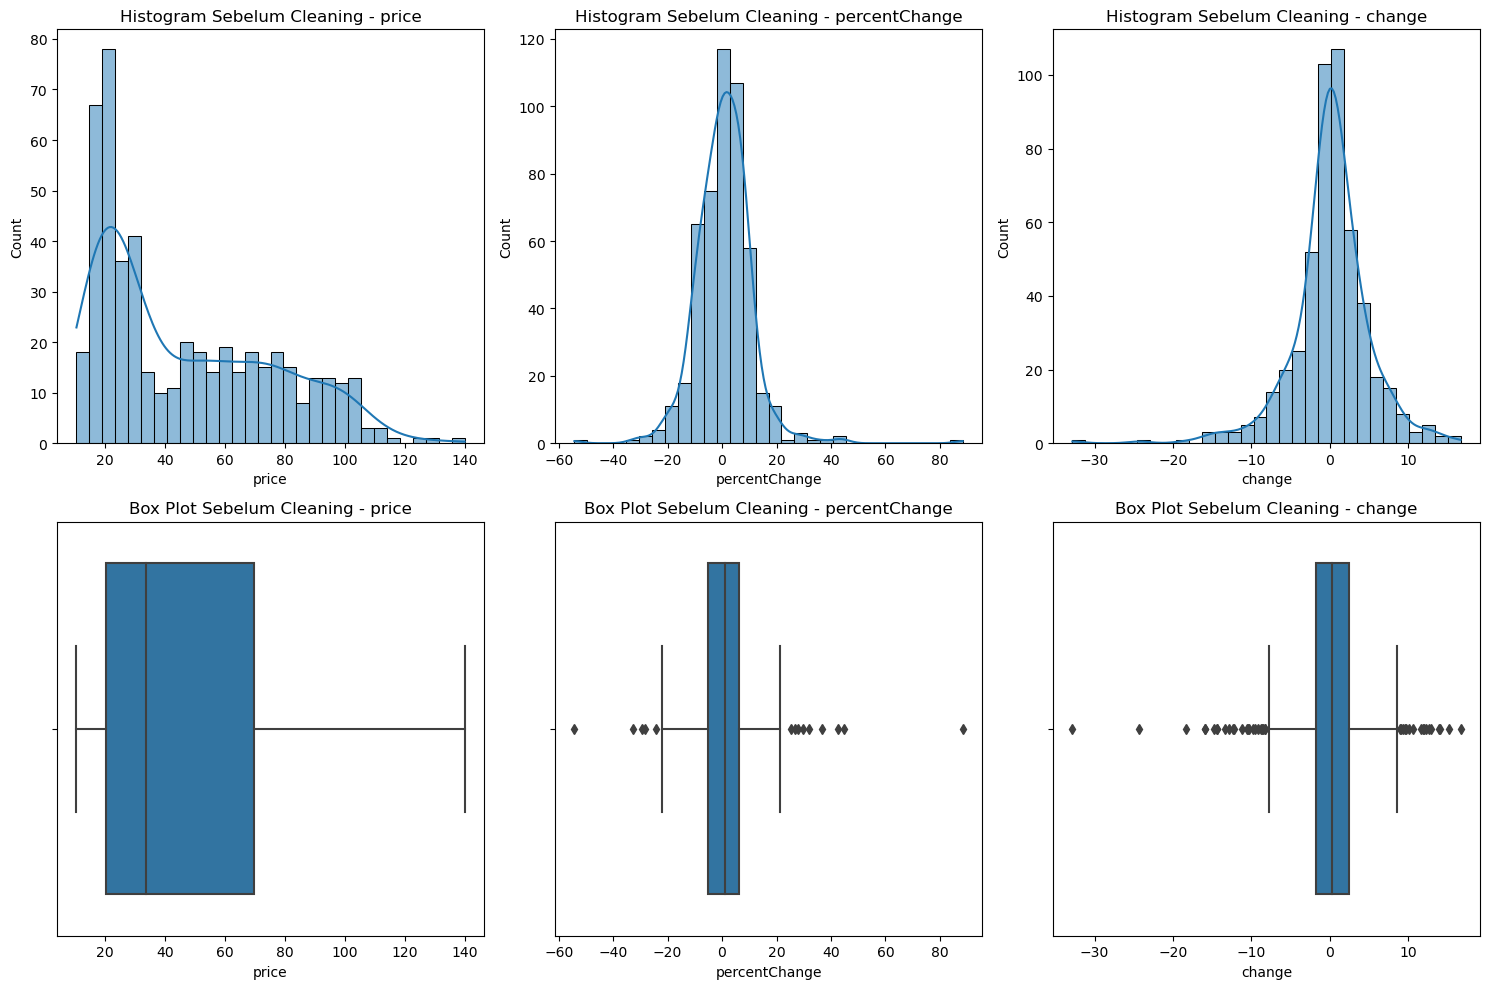


=== Perbandingan Jumlah Data ===
Sebelum Cleaning: 495 baris
Sesudah Cleaning: 446 baris


In [11]:
# Menampilkan informasi awal dataset
print("=== Informasi Dataset Sebelum Cleaning ===")
print(df.info())
print(df.describe())

# Deteksi Data Duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah Data Duplikat: {duplicates}")

# Deteksi Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values per Kolom:")
print(missing_values)

# Deteksi Outliers menggunakan IQR untuk kolom 'price', 'percentChange', dan 'change'
cols = ['price', 'percentChange', 'change']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan kondisi outlier untuk tiap kolom
outlier_condition = ((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)))
print("\nJumlah Outliers per Kolom:")
print(outlier_condition.sum())

# Data Cleaning:
# 1. Hapus duplikat
df_cleaned = df.drop_duplicates()
# 2. Hapus missing values
df_cleaned = df_cleaned.dropna()
# 3. Hapus outliers
outlier_filter = ~((df_cleaned[cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df_cleaned[outlier_filter]

# Simpan dataset yang telah dibersihkan
cleaned_file_path = 'crude-oil-price-cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nDataset yang telah dibersihkan disimpan sebagai '{cleaned_file_path}'")

# Visualisasi Histogram dan Box Plot (sebelum cleaning)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Histogram Sebelum Cleaning - {col}')
    
    sns.boxplot(x=df[col], ax=axes[1, i])
    axes[1, i].set_title(f'Box Plot Sebelum Cleaning - {col}')
plt.tight_layout()
plt.show()

# Perbandingan data sebelum dan sesudah cleaning
print("\n=== Perbandingan Jumlah Data ===")
print(f"Sebelum Cleaning: {df.shape[0]} baris")
print(f"Sesudah Cleaning: {df_cleaned.shape[0]} baris")


In [12]:
# Menghitung metrik
min_price = df_cleaned['price'].min()
max_price = df_cleaned['price'].max()
avg_price = df_cleaned['price'].mean()
max_change = df_cleaned['change'].max()

print(f"Harga Minyak Terendah: {min_price}")
print(f"Harga Minyak Tertinggi: {max_price}")
print(f"Harga Rata-Rata Minyak: {avg_price}")
print(f"Perubahan Harga Tertinggi: {max_change}")

Harga Minyak Terendah: 10.42
Harga Minyak Tertinggi: 113.93
Harga Rata-Rata Minyak: 44.000151569506734
Perubahan Harga Tertinggi: 8.59


Text(0, 0.5, 'Price (USD/Bbl)')

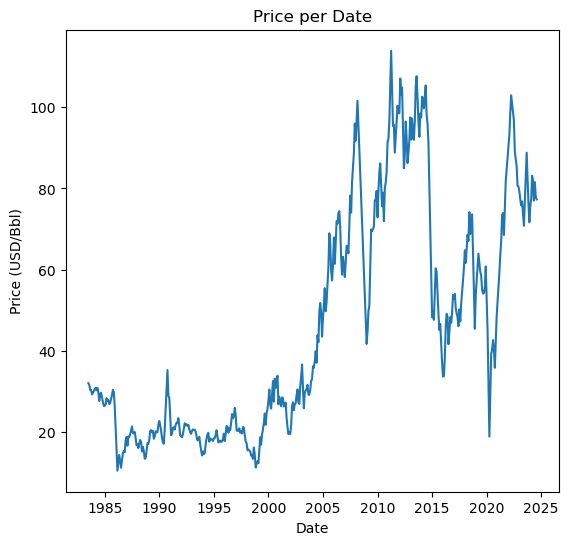

In [13]:
# Visualisasi metrik dengan line chart
plt.figure(figsize=(14, 6))

# Line Chart untuk Price per Date
plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='price', data=df_cleaned)
plt.title('Price per Date')
plt.xlabel('Date')
plt.ylabel('Price (USD/Bbl)')

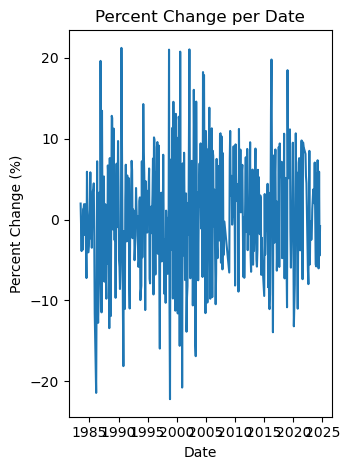

In [14]:
# Line Chart untuk PercentChange per Date
plt.subplot(1, 2, 2)
sns.lineplot(x='date', y='percentChange', data=df_cleaned)
plt.title('Percent Change per Date')
plt.xlabel('Date')
plt.ylabel('Percent Change (%)')

plt.tight_layout()
plt.show()

In [15]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca dataset yang telah dibersihkan
# df = pd.read_csv('crude-oil-price-cleaned.csv', parse_dates=['date'])

# # Judul Dashboard
# st.title("Dashboard Analisis Harga Minyak Mentah")

# # Menampilkan Metrik Utama
# st.header("Metrik Utama")
# col1, col2, col3, col4 = st.columns(4)
# with col1:
#     st.metric("Harga Minyak Terendah", f"{df['price'].min():.2f} USD/Bbl")
# with col2:
#     st.metric("Harga Minyak Tertinggi", f"{df['price'].max():.2f} USD/Bbl")
# with col3:
#     st.metric("Harga Rata-Rata", f"{df['price'].mean():.2f} USD/Bbl")
# with col4:
#     st.metric("Perubahan Harga Tertinggi", f"{df['change'].max():.2f}")

# # Visualisasi Histogram dan Box Plot dari dataset awal (jika diinginkan)
# st.header("Visualisasi Histogram dan Box Plot (Sebelum Cleaning)")
# # Untuk keperluan dashboard, kita anggap histogram dan boxplot sudah dilihat pada dataset awal
# # Jika Anda ingin menampilkannya, simpan hasil plotting dari kode cleaning dan tampilkan gambar.

# # Line Chart Price per Date
# st.header("Line Chart: Price per Date")
# fig1, ax1 = plt.subplots(figsize=(10, 4))
# sns.lineplot(x='date', y='price', data=df, ax=ax1)
# ax1.set_title('Price per Date')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Price (USD/Bbl)')
# st.pyplot(fig1)

# # Line Chart Percent Change per Date
# st.header("Line Chart: Percent Change per Date")
# fig2, ax2 = plt.subplots(figsize=(10, 4))
# sns.lineplot(x='date', y='percentChange', data=df, ax=ax2)
# ax2.set_title('Percent Change per Date')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Percent Change (%)')
# st.pyplot(fig2)
